In [254]:
# import needed modules
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [255]:
selected = ['MSFT', 'AAPL', 'V', 'MCD', 'HD', 'COST', 'DIS', 'PEP', 'NKE']
tickers = yf.Tickers(selected)

In [256]:
# get historical market data, here max is 5 years.
close = tickers.history(period="3y").Close
close.head()

[*********************100%***********************]  9 of 9 completed


,AAPL,COST,DIS,HD,MCD,MSFT,NKE,PEP,V
Date,,,,,,,,,
2017-05-23,147.415726,167.246399,102.484512,143.987900,137.385590,65.482628,50.420341,105.214653,92.044090
2017-05-24,146.974854,167.770035,103.145271,144.146011,138.946976,65.568451,50.236816,106.138336,92.975716
2017-05-25,147.482788,169.437973,102.723923,145.503769,139.207214,66.378876,50.565220,107.482666,93.201248
2017-05-26,147.233627,172.473114,103.815605,144.052994,139.281570,66.703026,50.797047,107.830185,92.838409
2017-05-30,147.291138,173.501038,103.748573,143.931396,139.346603,67.132111,51.115784,107.921623,92.887451


In [257]:
# calculate daily and annual returns of the stocks
returns_daily = close.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [258]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

In [259]:
# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

In [260]:
#set random seed for reproduction's sake
np.random.seed(101)

In [261]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [262]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

In [263]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

In [264]:
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

In [265]:
# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

In [266]:
# reorder dataframe columns
#df = df[column_order]

In [267]:
df.head()

,Returns,Volatility,Sharpe Ratio,MSFT weight,AAPL weight,V weight,MCD weight,HD weight,COST weight,DIS weight,PEP weight,NKE weight
0,0.234814,0.224234,1.047181,0.109213,0.120690,0.006022,0.036275,0.144929,0.176361,0.064920,0.188990,0.152599
1,0.245420,0.230130,1.066443,0.048101,0.140356,0.089176,0.046063,0.198950,0.244504,0.058842,0.021162,0.152846
2,0.198321,0.226852,0.874230,0.177946,0.067429,0.167282,0.126411,0.011835,0.033654,0.045638,0.242711,0.127094
3,0.201229,0.219296,0.917616,0.102743,0.130440,0.096206,0.162097,0.143417,0.071538,0.063412,0.169148,0.060999
4,0.207848,0.222066,0.935974,0.169377,0.162559,0.105366,0.180609,0.019020,0.020136,0.137347,0.174346,0.031240


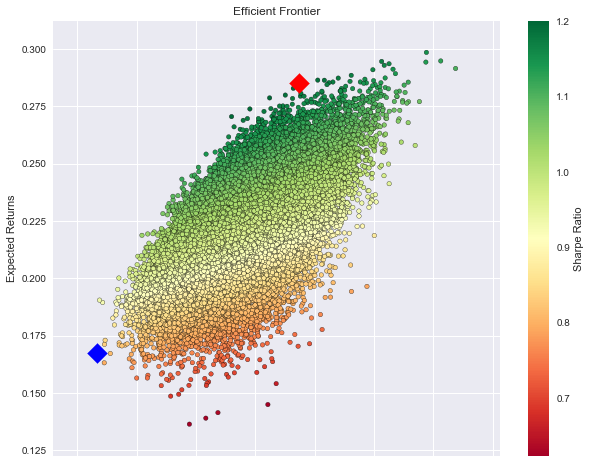

In [268]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [269]:
# Minimum Variance Portfolio:
print(min_variance_port.T)

                 44439
Returns       0.167441
Volatility    0.203347
Sharpe Ratio  0.823424
MSFT weight   0.019739
AAPL weight   0.250955
V weight      0.047428
MCD weight    0.024469
HD weight     0.234174
COST weight   0.014899
DIS weight    0.078394
PEP weight    0.298169
NKE weight    0.031772


In [270]:
# Optimized Portfolio:
print(sharpe_portfolio.T)

                  4971
Returns       0.284895
Volatility    0.237293
Sharpe Ratio  1.200606
MSFT weight   0.177771
AAPL weight   0.220899
V weight      0.009170
MCD weight    0.047404
HD weight     0.006252
COST weight   0.285496
DIS weight    0.203330
PEP weight    0.034987
NKE weight    0.014691
